# Creating a Visual Representation of Best Responses and Nash  in 2D
This paper will look into ways of visually connecting methods of identifying best responses and understanding dominance in a 2 player game in the space $(A, B)\in \mathbb{R}^{2 \times 2 ^2}$. We will be looking at a series of games that have certain characteristics to see how they differ in their best responses and visualisation. These characteristics include levels of dominant strategies and player rationality. 

Using utility matrices $(A,B)\in \mathbb{R}^{2 \times 2 ^2}$ we represent the strategy space of the row player as $\sigma_{r} = (x,1-x)$ and $\sigma_{c} = (y,1-y)$ for the column player. If we try to understand the game from the row players perspective, his score is dictated by the variables $x,y$ and $A$; one of which is in our control. If he knows that the column player will have mixed strategy in the form $\sigma_{c} = (y,1-y)$ how can he estimate the expected outcome utility of our strategy $(x,1-x)$? Using the utility equation for the row player we can see:
$$u_{r}(\sigma_{r},\sigma_{c}) = \sigma_{r} A \sigma_{c}^T =
        \begin{pmatrix}
        x & 1-x
        \end{pmatrix} 
        \begin{pmatrix}
        a_{11} & a_{12} \\
        a_{21} & a_{22}
        \end{pmatrix} 
        \begin{pmatrix}
        y\\
        1-y
        \end{pmatrix} =
        xy(a_{11} - a_{12} - a_{21}+a_{22})+x(a_{12}-a_{22})+y(a_{21}-a_{22})+a_{22} = f(x,y,A)$$
This is just a function of the two mixed strategy variables $x$ and $y$ and can be extended to calculate $u_c$ by using the column players utility matrix $B$. The function below calculates this utility for any matrix $M$ in and given $x,y$. We can leverage `numpy.meshgrid()` to evaluate this utility across a plane of $x,y\in [0,1]$.  

In [4]:
def get_utility_plane(x,y,M):
    '''Generates the utility plane using sympy and labdafy evaluation'''
    a, b = sym.symbols('a, b')
    A = sym.Matrix(M)
    # Define mixed strategies 
    sigma_r, sigma_c = sym.Matrix([[a, 1-a]]), sym.Matrix([b, 1-b])
    # Use sympy to evaluate and lambdafy
    result = (sigma_r * A *  sigma_c)[0]
    return sym.lambdify((a,b), result)(x,y)

 Using this method we plot the plane for the games, Matching Pennies(MP) \& The Prisoners Dilemma(PD) below using `matplotlib.pyplot.contourf()`:
$$  \text{MP:  }
            A=\begin{pmatrix}1 & -1 \\ -1 & 1\end{pmatrix}\quad
            B=\begin{pmatrix}-1 & 1 \\ 1 & -1\end{pmatrix}\qquad\vert\qquad
        \text{PD: }
            A=\begin{pmatrix}3 & 0 \\ 5 & 1\end{pmatrix}\quad
            B=\begin{pmatrix}3 & 5 \\ 0 & 1\end{pmatrix}$$    

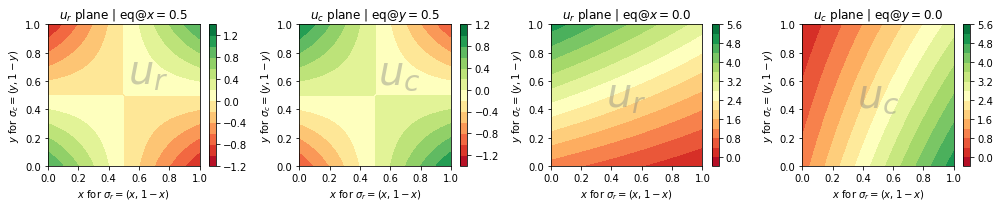

In [91]:
plt.figure(figsize=(14,3))
plot_matrix_pair(np.array([[1,-1],[-1,1]]), -np.array([[1,-1],[-1,1]]), 141, plot_poly=False, cfill=True,offset_watermark=True)
plot_matrix_pair(np.array([[3,0],[5,1]]), np.array([[3,5],[0,1]]), 143, plot_poly=False, cfill=True, save_str="f1.pdf")  

Here we see a filled contour plot of what the opponents are doing and the respective play off utility for a single turn of moves. The axis represents how players can form a strategy space but only control 1 axis; the row player controls $x$ and the column player controls $y$. For example, in the MP game (left pair) we can see that its best for players to play in the corners, however, the best utilities for players lie in opposite corners in the 2 utility planes; if a player was to try and play a corner (e.g $y=0$) the other player could exploit this ($x=1$). This is expected for zero-sum games because for one player to win in this type of game the other must lose. 

The equilibria here can be seen to be $x=.5, \, y=.5$, as `nashpy` calculated, by observing the utility plane and asking, for both players, 'if I move can I score better?'. The answer is no. Consider moving $y$ to $0$, then $x$ could also move to $0$ and get an expected utility of $1$ leaving $u_c=-1$.
    
The second game is The Prisoners Dilemma, a strongly dominated game. The Nash equilibria is less clear but by analysing the 2 utility matrices, and asking the question again, we can see that $x=0$, $y=0$ does make sense. The second strategy for both matrices is strongly dominant, i.e. playing anything other than $x=0$ and $y=0$ is irrational. 

The process of asking 'if I set my variable differently can I score better?' in turn for each player will eventually end up with finding an equilibria. What were actually doing here is support enumeration, checking if positions across 2 positions are best responses to each other, this is more clear when we add more equilibria points to the examples. Below are made up games that have multiple equilibria points (the best responses are underlined): 
$$ \text{LEFT:  }
            A=\begin{pmatrix}\underline1 & 0 \\ 0 & \underline1\end{pmatrix}\quad
            B=\begin{pmatrix}\underline1 & 0 \\ \underline0 & \underline0\end{pmatrix}\qquad\vert\qquad
        \text{RIGHT: }
            A=\begin{pmatrix}\underline2 & 0 \\ 0 & \underline3\end{pmatrix}\quad
            B=\begin{pmatrix}\underline3 & 0 \\ 0 & \underline2\end{pmatrix}$$

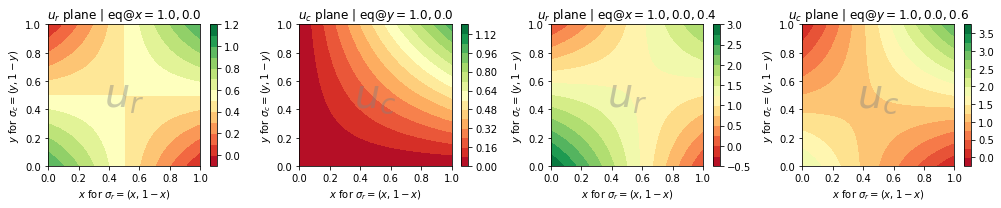

In [90]:
plt.figure(figsize=(14,3)) 
plot_matrix_pair(np.array([[1,0],[0,1]]), np.array([[1,0],[0,0]]), 141, plot_poly=False, cfill=True)
plot_matrix_pair(np.array([[2,0],[0,3]]), np.array([[3,0],[0,2]]), 143, plot_poly=False, cfill=True, save_str="f2.pdf")

Lets think of the support enumeration algorithm, the first step is to identify best responses support size $1$. The above matrices have matching best responses when the position in both $A$ and $B$ are underlined and thus an equilibria. In the left game there are 2, at $\sigma_r=(1,0),\, \sigma_c=(1,0)$ and $\sigma_r=(0,1),\, \sigma_c=(0,1)$. This also holds for the right game too. Looking at the plane this is clear because both players will benefit from these positions and have no reason to move.

What is more difficult to see is the equilibria $\sigma_r=(0.4,0.6),\, \sigma_c=(0.6,0.4)$ of the right game. In the support enumeration algorithm this corresponds to the solving of best response mixed strategies of support size 2:        $$ 
        \sum_{i\in I} \sigma_{r_i} B_{ij} = v \, \forall j \in J \quad \text{or} \quad
        \begin{pmatrix} \sigma_{r_1} & \sigma_{r_2} \end{pmatrix}
        \begin{pmatrix} 3 & 0 \\ 0 & 2 \end{pmatrix}
        = 
        \begin{pmatrix} v & v \end{pmatrix}
        \Rightarrow
        3 \sigma_{r_1} = 2 \sigma_{r_2}
        \Rightarrow
        3 x = 2(1-x) 
        \Rightarrow
        x=2/5 = 0.4
        $$
    and 
    $$ 
        \sum_{j\in J} A _{ij} \sigma_{c_j} = u \, \forall i \in I \quad \text{or} \quad
        \begin{pmatrix} 2 & 0 \\ 0 & 3 \end{pmatrix}
        \begin{pmatrix} \sigma_{c_1} \\ \sigma_{c_2} \end{pmatrix}
        = 
        \begin{pmatrix} u \\ u \end{pmatrix}
        \Rightarrow
        2 \sigma_{c_1} = 3 \sigma_{c_2}  
        \Rightarrow
        2 y = 3(1-y) 
        \Rightarrow
        y=3/5 = 0.6$$

These equations represent providing an opponent with an indifferent choice of utility for their strategy. If, for both players, the calculated mixed strategy is the best response to their opponents calculated mixed strategy then a nash equilibria has been found. This result can be visually understood by identifying that the a players choice of mixed strategy sits on the inflection point of the utility plane of the their opponent. This means that each player must actively decide to play their opponents inflection point or be taken advantage of; i.e. they provide an indifferent utility score to their opponent while also being provided an indifferent score.

The relationship between pairs of visual utility planes and the calculated best responses can easily describe an example. Imagine you, the row player, are busy at home with your new puppy and have $\sigma_r=($ignore$,$ pet$)$ while the puppy has $\sigma_c=($come to you$,$ run away$,$ play with a toy$)$. This leads pay off matrices:
$$
    A = \begin{pmatrix} 2 & 2 & -6 \\ \underline6 & \underline6 & \underline3 \\ \end{pmatrix}
    \qquad \vert \qquad
    B = \begin{pmatrix} \underline4 & 2 & \underline4 \\ \underline6 & -1 & \underline6 \\ \end{pmatrix}
    $$
 Immediately it can be seen that this game reduces to a strongly dominant matrix $A$ (always pet the puppy) vs the non dominant $B$ (dogs love toys or cuddles). This leads to the outcome that the row player will always play his dominant strategy and the column player has no control over his own score. An interesting observation is that because of the strongly dominant nature of $A$ the row player can play any $\sigma_c=(y,0,1-y)\quad \forall y \in [0,1]$. This leads us to an interesting outcome; there are infinite nash equilibria: $x=0,\, y\in[0,1]$ the strategy $\sigma_r=(0,1)$ has any response by the column player as a best response, giving an example of a degenerate game.

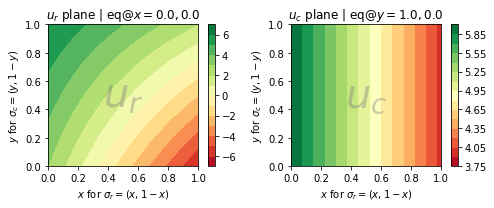

In [93]:
plt.figure(figsize=(7,3)) 
plot_matrix_pair(np.array([[2,-6],[6,3]]), np.array([[4,4],[6,6]]), 121, plot_poly=False, cfill=True, save_str="f3.pdf")

In [99]:
# SUPPORT ENUMERATION IN NASHPY
A = np.array([[2, 2, -6], [6, 6, -3]])
B = np.array([[4, 2, 4], [6, -1, 6]])
g = nash.Game(A, B)
for pairs in g.support_enumeration():
    print('sigma_r:', pairs[0], '\t sigma_c:', pairs[1])

sigma_r: [0. 1.] 	 sigma_c: [1. 0. 0.]
sigma_r: [0. 1.] 	 sigma_c: [0. 0. 1.]


-------------------------

## Appendix

-------------

In [2]:
def make_positive(A,B):
    '''Returns A & B Scaled to be positive'''
    # locate smallest value(<=0), then multiply it to a matrix of 1s to add
    min_entry = min(min(A),min(B))
    val_to_add = np.abs(min_entry)+1 if min_entry <= 0 else 0
    return A + sym.ones(2,2)*val_to_add, B + sym.ones(2,2)*val_to_add 

def get_polytope_vertex_eqns(A,B):
    '''returns a list of binding inequality functions. first 2 is for Q and second for P'''
    x1, x2, y1, y2 = sym.symbols('x_1, x_2, y_1, y_2')
    A, B, X, Y = sym.Matrix(A), sym.Matrix(B), sym.Matrix([[x1,x2]]), sym.Matrix([y1,y2])
    A, B = make_positive(A,B)
    # Create functions list so we store the functions in label positions (calc Q first) 0,1,2,3 
    # these will be in form x_1 = f(x_2) and y_1 = g(y_2)
    functions = list()
    # --FOR P:for conditions 0,1: Ay<=1 or Ay-1=0
    Ay = A*Y-sym.ones(2,1)
    # Generate labdas for plotting
    for row in Ay:
        functions += [sym.lambdify(y1,sym.solve(row,y2)[0])]
    # --FOR Q: for conditions 2,3: xB<=1 or xY-1=0
    xB = X*B-sym.ones(1,2)
    for row in xB:
        functions += [sym.lambdify(x1,sym.solve(row,x2)[0])]
    return functions

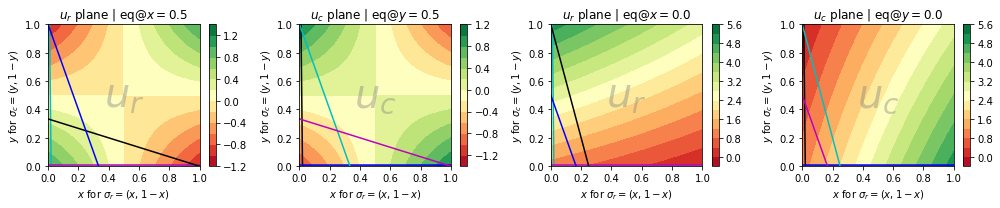

In [88]:
plt.figure(figsize=(14,3))
plot_matrix_pair(np.array([[1,-1],[-1,1]]), -np.array([[1,-1],[-1,1]]), 141, cfill=True)
plot_matrix_pair(np.array([[3,0],[5,1]]), np.array([[3,5],[0,1]]), 143, cfill=True)

The colours here represent the labels of the polytope: cyan(0), magenta(1), black(2) \& blue(3). For the labels in the Matching Pennies game (left pair), for $u_r$, the black and blue lines represent the second and first strategies of the column player having maximum utility respectively. This can be seen by looking at the $u_c$ plane and observing if $x$ was on the blue line (in the $u_r$ plane) then the best response for the column player is picking $y=1$, pushing the row player up into the red. If $x$ is on the black line (in the $u_r$ plane), then, after scaling, the best response by the column player would be to play $y=0$.
    
What is meant by "being on the blue line" is not a true location on the plane. The lines represent scaled variables, in this case, correspond to playing $\sigma_r = (x,1-x)$ where $x_1=x$ and $x_2=1-x$. Being on the blue line means that the coordinates map to the mixed strategy $(x_1,x_2)$ which gives the second strategy of the column player its highest utility. If we look at the $u_r$ plane in the PD we can see that the blue line corresponds to 
    
Using this overlay polytope allows us to verify the equilibria. Selecting a pair of matching labelled vertices, as the vertex enumeration algorithm describes, will result in the correct isolation of the un-scaled equilibria coordinates. However, because of the representation of our strategies, we must only be interested in the $x_1$ or $y_1$ value after scaling to calculate $x_2$ or $y_2$. Below is another example of 2 more games, This time the left pair is modified pennies, and the right pair is a weakly dominant row player vs a non-dominant column player.

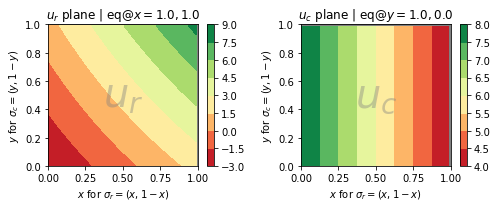

# Appendix

In [87]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import nash
import sympy as sym
sym.init_printing()

def plot_matrix_pair(A, B, subplot_base=121, norm_max=1, norm_min=-1, 
                     colour='grey', plot_poly=True, cfill=False, 
                     save_str="", offset_watermark=False):
    '''Plots a game A vs B to the screen. Polytope Vertacies: 0:cyan, 1:magenta, 2:black, 3:blue'''
    # Create [0,1]^2 plane:
    x_range, y_range = [np.arange(0, 1.1, 0.01)] * 2
    x_grid, y_grid = np.meshgrid(x_range, y_range)

    polytope_eqns = get_polytope_vertex_eqns(A,B)
    game = nash.Game(A, B)
    eqlbria = list(game.support_enumeration())
    num_eqs = len(eqlbria)
    
    # Build the Data for row player:
    row_Z = get_utility_plane(x_grid, y_grid, A)
    
    # Build the Data for col player:
    col_Z = get_utility_plane(x_grid, y_grid, B)
    
    #PLOTS
    plt.rcParams['axes.facecolor'] = colour
    
    #Row: P = {x \in R | x>=0, xB<=1}
    plt.subplot(subplot_base)
    
    if cfill:
        plt.contourf(x_grid, y_grid, row_Z, 15, cmap='RdYlGn') # Norm is for the coloured lines
    else:
        plt.contour(x_grid, y_grid, row_Z, cmap='RdYlGn', norm=mpl.colors.Normalize(vmin=norm_min, vmax=norm_max)) # Norm is for the coloured lines
    
    if plot_poly:
        plt.plot(x_range,[1,1]+[0]*(len(x_range)-2),'c-',x_range,[0.01]*len(x_range),'m-')
        plt.plot(x_range,polytope_eqns[2](x_range),'k-',x_range,polytope_eqns[3](x_range),'b-')
    plt.colorbar()
    eqs = ",".join(["{:.1f}".format(eqlbria[n][0][0]) for n in range(num_eqs)])
    plt.title("$u_r$ plane | eq@$x="+eqs+"$")
    plt.xlabel("$x$ for $\sigma_r=(x,1-x)$")
    plt.ylabel("$y$ for $\sigma_c=(y,1-y)$")
    plt.xlim(0,1)
    plt.ylim(0,1)
    if offset_watermark:
        plt.text(0.66, 0.66,'$u_r$', horizontalalignment='center',verticalalignment='center', color='grey', fontsize=40, alpha=0.4)
    else:
        plt.text(0.5, 0.5,'$u_r$', horizontalalignment='center',verticalalignment='center', color='grey', fontsize=40, alpha=0.4)
        
    
    #Col: Q = {y \in R | Ay<=1, y>=0}
    plt.subplot(subplot_base+1)
    if cfill:
        plt.contourf(x_grid, y_grid, col_Z, 15, cmap='RdYlGn') # Norm is for the coloured lines
    else:
        plt.contour(x_grid, y_grid, col_Z, cmap='RdYlGn', norm=mpl.colors.Normalize(vmin=norm_min, vmax=norm_max)) # Norm is for the coloured lines
    
    if plot_poly:
        plt.plot(x_range,[1,1]+[0]*(len(x_range)-2),'k-',x_range,[0.01]*len(x_range),'b-')
        plt.plot(x_range,polytope_eqns[0](x_range),'c-',x_range,polytope_eqns[1](x_range),'m-')
    plt.colorbar()
    eqs = ",".join(["{:.1f}".format(eqlbria[n][1][0]) for n in range(num_eqs)])
    plt.title("$u_c$ plane | eq@$y="+eqs+"$")
    plt.xlabel("$x$ for $\sigma_r=(x,1-x)$")
    plt.ylabel("$y$ for $\sigma_c=(y,1-y)$")
    plt.xlim(0,1)
    plt.ylim(0,1)
    if offset_watermark:
        plt.text(0.66, 0.66,'$u_c$', horizontalalignment='center',verticalalignment='center', color='grey', fontsize=40, alpha=0.4)
    else:
        plt.text(0.5, 0.5,'$u_c$', horizontalalignment='center',verticalalignment='center', color='grey', fontsize=40, alpha=0.4)
     
    plt.tight_layout()
    
    if not save_str == "":
        plt.savefig("img/"+save_str)

ITS CLEAR WHEN WE ADD MORE EQUALIBRIA POINTS...

It may however be easier to look at a support polytope. Recall that polytopes $P,Q$ for the game $(A, B)\in \mathbb{R}^{2 \times 2 ^2}$ are defined as:
        $$P = \{\bar x \in \mathbb{R}^2 \, |\,  \bar x \ge 0, \, \bar x B \le 1 \}\text{ for the row player}$$
        $$Q = \{\bar y \in \mathbb{R}^2 \, |\, A\bar y \le 1, \, \bar y \ge 0\} \text{ for the col player}$$
    
The binding inequalities $\bar x B = 1$ and $A\bar y = 1$ stand for the conditions when the opponents' strategies are at the maximum utility. By overlapping these onto the utility planes we can verify what is meant by these statements. The below code is a programmatic way of calculating the 4 equalities needed to plot the half-spaces on the plane.